# Outlier Detection - different methods

# Author/Created by: Ajay Taneja

# Date: September - October 2022.

# Removal of outliers using different methods (see references section for the link to the dataset)

You are given the Bangalore (India) property prices dataset. You need to examine the price per square feet column and do the following:

(1) Remove the outliers using the percentile method. 
(2) USe [0.001, 0.999] for lower and upper bound percentiles
(3) After removing the outliers using the percentile method, you geta  new dataframe
(4) On this new (step 3) dataframe, use 4 standard deviation to remove outliers
(5) Plot histogram of new dataframe that is generated
(6) On this step 3 dataframe, use Z-score of 4 to remove the outliers. It is same as using 4 sstandard deviation, yet do it!


In [4]:
#Load the dataframe

import pandas as pd
df = pd.read_csv("bhp.csv")
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [5]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [7]:
min_threshold, max_threshold = df.price_per_sqft.quantile([0.001, 0.999])
min_threshold, max_threshold

(1366.184, 50959.36200000098)

In [8]:
df2 = df[(df.price_per_sqft > min_threshold) & (df.price_per_sqft < max_threshold)]
df2.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [22]:
# On df2 we have to use 4 standard deviation to remove the outliers

upper_limit = df2.price_per_sqft.mean() + 4*df2.price_per_sqft.std()
lower_limit = df2.price_per_sqft.mean() - 4*df2.price_per_sqft.std()
upper_limit, lower_limit

df3 = df2[(df2.price_per_sqft < upper_limit) & (df2.price_per_sqft > lower_limit)]
df3.sample(10)
df2.shape[0] - df3.shape[0]

125

Now, to plot the histogram of the new dataframe that is generated

In [20]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)

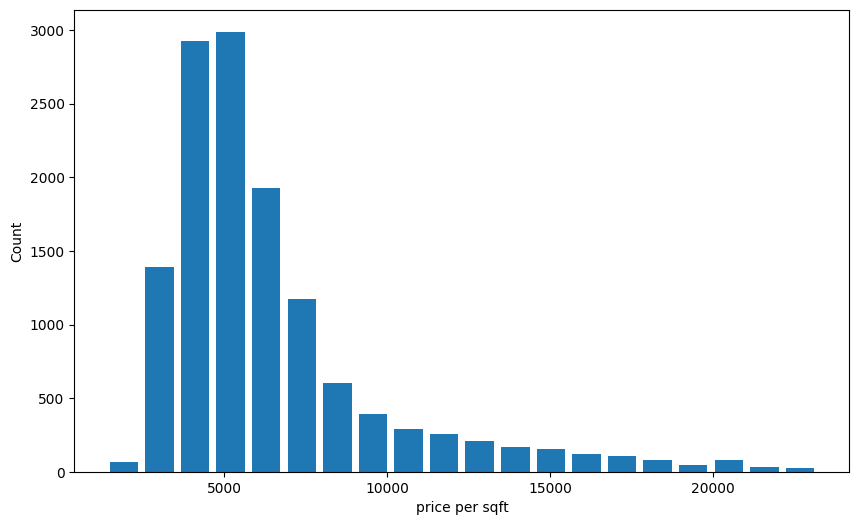

In [21]:
#Histogram is graphical display of the feature and is displayed using bars
#Here its going to be the price per sqft and the 
plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('price per sqft')
plt.ylabel('Count')
plt.show()

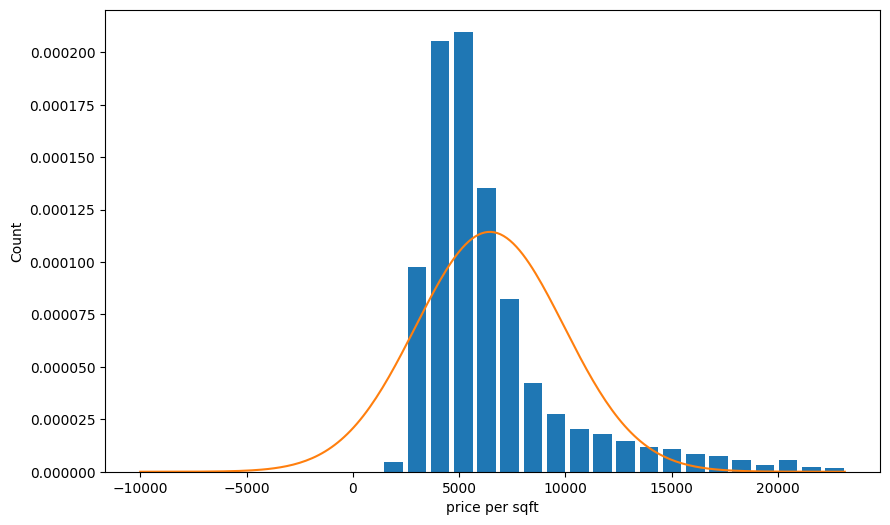

In [29]:
from scipy.stats import norm
import numpy as np
plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8, density=1)
plt.xlabel('price per sqft')
plt.ylabel('Count')

rng = np.arange(-10000, df3.price_per_sqft.max(), 150)
plt.plot(rng, norm.pdf(rng, df3.price_per_sqft.mean(), df3.price_per_sqft.std()))

Point no 6 is as good as 4 standard devation so is not repeated here!

References:
1) Kaggle Bangalore Property Dataset: https://www.kaggle.com/datasets/ameythakur20/bangalore-house-prices
2)https://youtu.be/KFuEAGR3HS4?list=PLeo1K3hjS3ut5olrDIeVXk9N3Q7mKhDxO&t=1060